In [39]:

import cv2

cap= cv2.VideoCapture('./images/giphsquat.gif')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    
    cv2.imwrite('./gif_spread/kang'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

In [57]:
import cv2
import sys
import time
import logging
import numpy as np
import matplotlib.pyplot as plt

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

#parameters
model='mobilenet_thin'
resize='432x368'
w, h = model_wh(resize)

# creating estimator
e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

image_path = './gif_spread/squat0.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)
# plt.grid();

[2021-03-31 16:03:56,732] [TfPoseEstimator] [INFO] loading graph from /Users/andrewmumford/Desktop/p3-final/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
2021-03-31 16:03:56,732 INFO loading graph from /Users/andrewmumford/Desktop/p3-final/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

In [58]:
image = common.read_imgfile(image_path, None, None)

In [59]:
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

In [60]:
# max_prob = np.amax(e.heatMat[:, :, :-1], axis=2)
# plt.imshow(max_prob)
# plt.grid();

In [61]:
# plt.figure(figsize=(15,8))
# bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
# bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)
# plt.imshow(bgimg, alpha=0.5)
# plt.imshow(max_prob, alpha=0.5)
# plt.colorbar()
# plt.grid();

In [62]:
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)


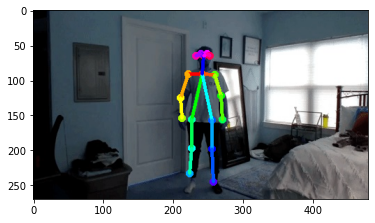

In [63]:
plt.imshow(image)

In [64]:
cv2.imwrite('./skelly/test.jpg',image)

True

In [55]:
humans

[BodyPart:0-(0.51, 0.24) score=0.77 BodyPart:1-(0.50, 0.34) score=0.71 BodyPart:2-(0.46, 0.34) score=0.78 BodyPart:3-(0.44, 0.46) score=0.59 BodyPart:4-(0.44, 0.57) score=0.57 BodyPart:5-(0.54, 0.34) score=0.74 BodyPart:6-(0.56, 0.45) score=0.69 BodyPart:7-(0.56, 0.58) score=0.60 BodyPart:8-(0.47, 0.58) score=0.54 BodyPart:9-(0.47, 0.73) score=0.60 BodyPart:10-(0.47, 0.86) score=0.50 BodyPart:11-(0.53, 0.58) score=0.57 BodyPart:12-(0.53, 0.73) score=0.58 BodyPart:13-(0.54, 0.91) score=0.57 BodyPart:14-(0.50, 0.23) score=0.76 BodyPart:15-(0.52, 0.23) score=0.84 BodyPart:16-(0.49, 0.24) score=0.76 BodyPart:17-(0.53, 0.24) score=0.53]

In [23]:
keypoints = str(str(str(humans[0]).split('BodyPart:')[1:]).split('-')).split(' score=')

In [24]:
keypoints


['["[\'0", "(0.51, 0.15)',
 '0.79 \', \'1", "(0.54, 0.21)',
 '0.67 \', \'2", "(0.44, 0.20)',
 '0.42 \', \'3", "(0.30, 0.18)',
 '0.25 \', \'4", "(0.28, 0.19)',
 '0.11 \', \'5", "(0.64, 0.20)',
 '0.49 \', \'8", "(0.44, 0.41)',
 '0.45 \', \'9", "(0.41, 0.62)',
 '0.30 \', \'10", "(0.39, 0.70)',
 '0.13 \', \'11", "(0.61, 0.41)',
 '0.45 \', \'12", "(0.62, 0.57)',
 '0.54 \', \'13", "(0.64, 0.70)',
 '0.56 \', \'14", "(0.50, 0.14)',
 '0.77 \', \'15", "(0.54, 0.14)',
 '0.71 \', \'16", "(0.46, 0.14)',
 '0.57 \', \'17", "(0.58, 0.14)',
 '0.59\']"]']

In [25]:
import pickle

In [77]:
with open('./pickled_frames/d', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(keypoints, f, pickle.HIGHEST_PROTOCOL)

In [30]:
with open('data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(keypoints, f, pickle.HIGHEST_PROTOCOL)

In [76]:
with open('pickled_frames/d', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data1 = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'pickled_frames/d'

In [69]:
data


['["[\'0", "(0.51, 0.15)',
 '0.79 \', \'1", "(0.54, 0.21)',
 '0.67 \', \'2", "(0.44, 0.20)',
 '0.42 \', \'3", "(0.30, 0.18)',
 '0.25 \', \'4", "(0.28, 0.19)',
 '0.11 \', \'5", "(0.64, 0.20)',
 '0.49 \', \'8", "(0.44, 0.41)',
 '0.45 \', \'9", "(0.41, 0.62)',
 '0.30 \', \'10", "(0.39, 0.70)',
 '0.13 \', \'11", "(0.61, 0.41)',
 '0.45 \', \'12", "(0.62, 0.57)',
 '0.54 \', \'13", "(0.64, 0.70)',
 '0.56 \', \'14", "(0.50, 0.14)',
 '0.77 \', \'15", "(0.54, 0.14)',
 '0.71 \', \'16", "(0.46, 0.14)',
 '0.57 \', \'17", "(0.58, 0.14)',
 '0.59\']"]']

In [75]:
data1

['["[\'0", "(0.51, 0.15)',
 '0.79 \', \'1", "(0.54, 0.21)',
 '0.67 \', \'2", "(0.44, 0.20)',
 '0.42 \', \'3", "(0.30, 0.18)',
 '0.25 \', \'4", "(0.28, 0.19)',
 '0.11 \', \'5", "(0.64, 0.20)',
 '0.49 \', \'8", "(0.44, 0.41)',
 '0.45 \', \'9", "(0.41, 0.62)',
 '0.30 \', \'10", "(0.39, 0.70)',
 '0.13 \', \'11", "(0.61, 0.41)',
 '0.45 \', \'12", "(0.62, 0.57)',
 '0.54 \', \'13", "(0.64, 0.70)',
 '0.56 \', \'14", "(0.50, 0.14)',
 '0.77 \', \'15", "(0.54, 0.14)',
 '0.71 \', \'16", "(0.46, 0.14)',
 '0.57 \', \'17", "(0.58, 0.14)',
 '0.59\']"]']